# Textures

Scene Elements (and agents) can have different textures.
We wil lreview them here.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

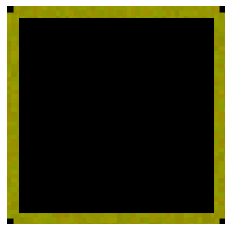

In [9]:
from simple_playgrounds.playgrounds.layouts import SingleRoom
from simple_playgrounds.engine import Engine

my_playground = SingleRoom(size=(200, 200))

# we use the option replay=True to reset the environment if it terminates before time_limit.
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode = True))

## Color texture

The most basic texture is a uniform color.

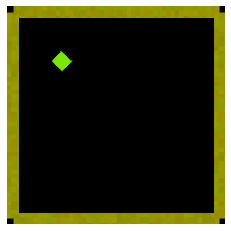

In [10]:
from simple_playgrounds.elements.collection.basic import Physical

elem = Physical(physical_shape = 'square', radius = 10, texture = [123, 234, 0])
my_playground.add_element(elem, ((50,50),0) )

plt_image(engine.generate_playground_image(plt_mode = True))

Note that the texture parameters can be provided as a list/tuple, a dictionary of parameters, or a class.
If a class is provided, it must be instanciated by giving the radius of the element as an additional parameter.

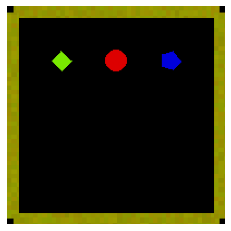

In [11]:
from simple_playgrounds.common.texture import ColorTexture

elem = Physical(physical_shape = 'circle', radius = 10, texture = ColorTexture(color=(222, 0, 0), size=10))
my_playground.add_element(elem, ((100,50),0) )

elem = Physical(physical_shape = 'pentagon', radius = 10, texture = {'texture_type': 'color', 'color':(0, 0, 222), 'size':10})
my_playground.add_element(elem, ((150,50),0))

plt_image(engine.generate_playground_image(plt_mode = True))

## Advanced Textures

Simple playgrounds includes aready available textures:
- ColorTexture: Unique color across the object
- UniformTexture: Each pixel has a random color.
- RandomTilesTexture: Texture composed of squared tiles
- UniqueRandomTilesTexture: Generate N different RandomTilesTexture
- PolarStripesTexture: Stripes centered
- CenteredRandomTilesTexture: Random stripes centered
- ListCenteredRandomTiles: Stipes come from a list


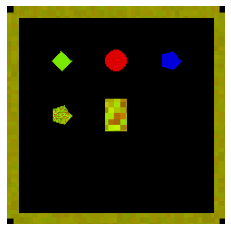

In [12]:
from simple_playgrounds.common.texture import RandomUniformTexture, RandomTilesTexture

text_uniform = RandomUniformTexture(color_min=(100, 100, 0), color_max=(200, 250, 0), size = 10)
elem = Physical(physical_shape = 'pentagon', radius = 10, texture = text_uniform)
my_playground.add_element(elem, ((50,100),0))

text_tiles = RandomTilesTexture(color_min=(150, 100, 0), color_max=(200, 250, 0), size_tiles=5, size = 40)
elem = Physical(physical_shape = 'rectangle', size=(20, 30), texture = text_tiles)
my_playground.add_element(elem, ((100,100),0))

plt_image(engine.generate_playground_image(plt_mode = True))

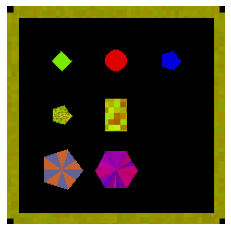

In [13]:
from simple_playgrounds.common.texture import CenteredRandomTilesTexture, MultipleCenteredStripesTexture

text_polar = MultipleCenteredStripesTexture(color_1=(200, 100, 50), color_2= (100, 100, 150), size=20, n_stripes=5)
elem = Physical(physical_shape = 'pentagon', radius = 20, texture = text_polar)
my_playground.add_element(elem, ((50,150),0))

text_random_tiles_centered = CenteredRandomTilesTexture(color_min=(100, 0, 100), color_max=(200, 0, 200), size=20, size_tiles=20)
elem = Physical(physical_shape = 'hexagon', radius = 20, texture = text_random_tiles_centered)
my_playground.add_element(elem, ((100,150),0))

plt_image(engine.generate_playground_image(plt_mode = True))

In [14]:
engine.terminate()